<a href="https://colab.research.google.com/github/Vrroom/notebooks/blob/main/DataVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Annotations from Pilot-2 

In [ ]:
# Setup 
!nvidia-smi
!git clone https://github.com/openai/CLIP
!pip install -e ./CLIP
!git clone https://github.com/Vrroom/vectorrvnn
!pip install setuptools-rust
!apt install rustc
import os
os.chdir('vectorrvnn')
!python3 setup.py install --user
os.chdir('../')
!rm -r vectorrvnn
!pip install gdown  
!gdown --fuzzy  https://drive.google.com/file/d/1C58pb-EDjcuA1yidG1cc4qBcFy2FQXBb/view?usp=sharing
!unzip pilot-2.zip
import sys
sys.path.append('./CLIP')
!apt-get install graphviz graphviz-dev
!pip install pygraphviz
!pip install geopandas

You'll have to restart the kernel after the previous step so that installed modules are registered. It is what it is ⏳.

## Visualize Annotations

./data/3cd97536-e4c0-45dc-aae3-b5b7bff9fbef


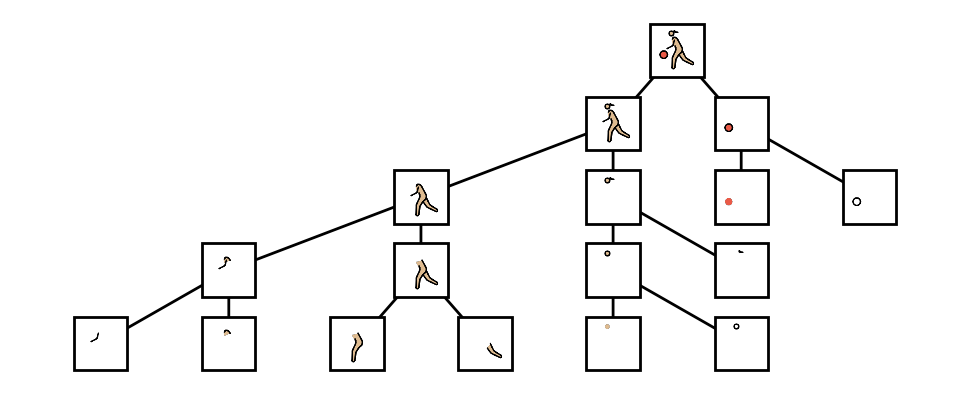

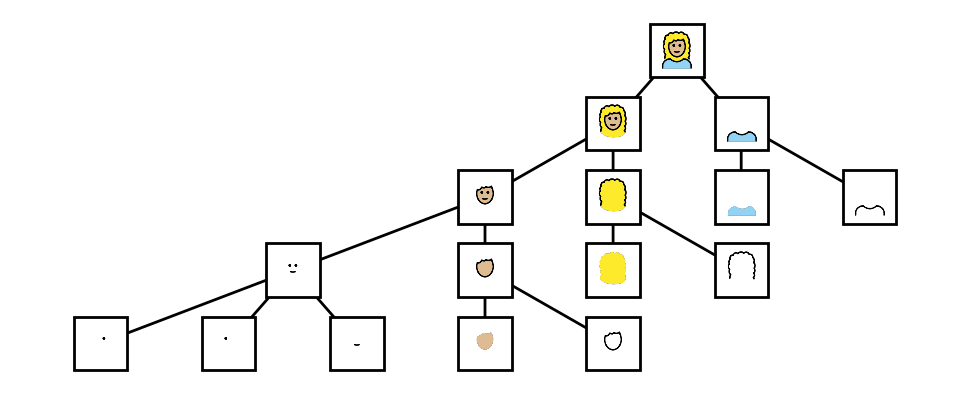

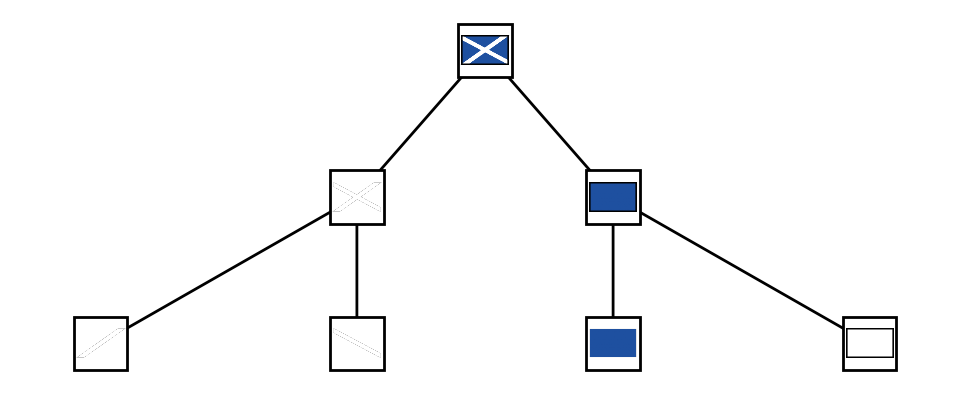

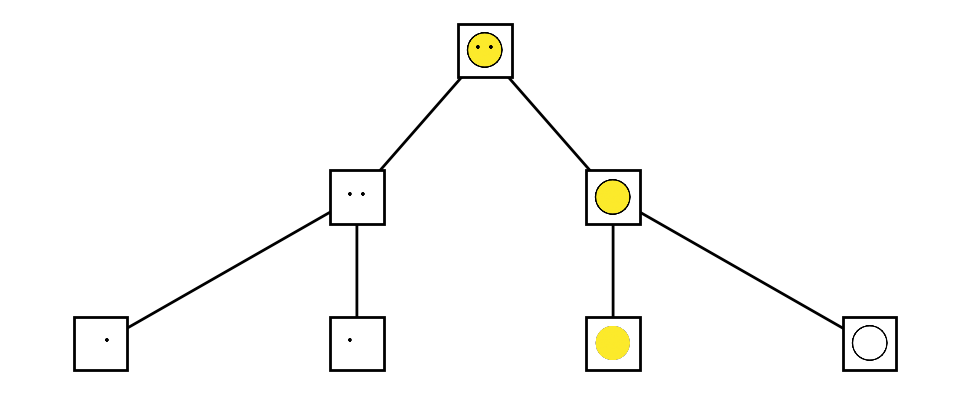

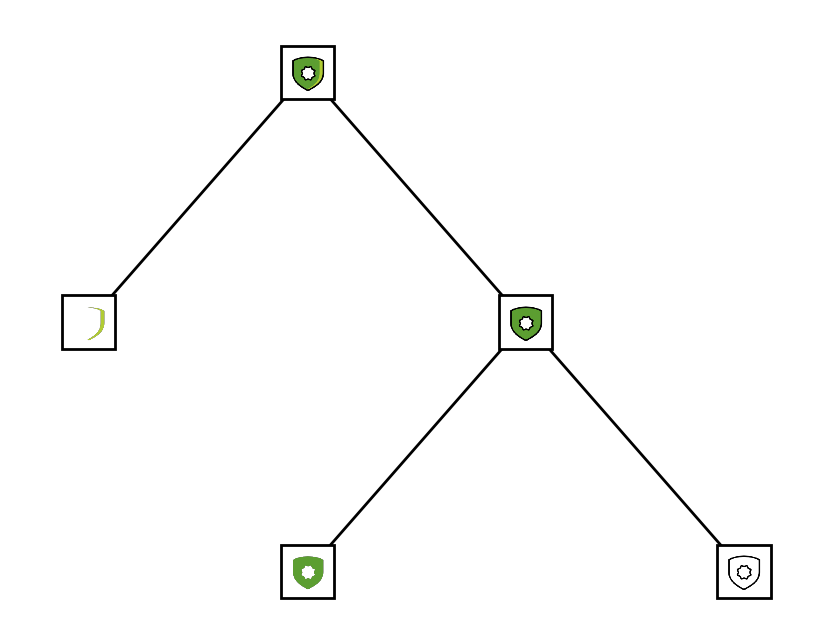

./data/3e715b67-2239-477f-8999-11b159d55f53


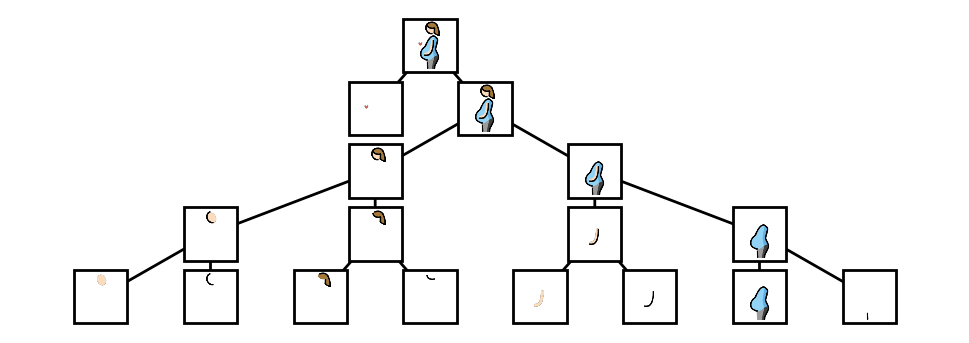

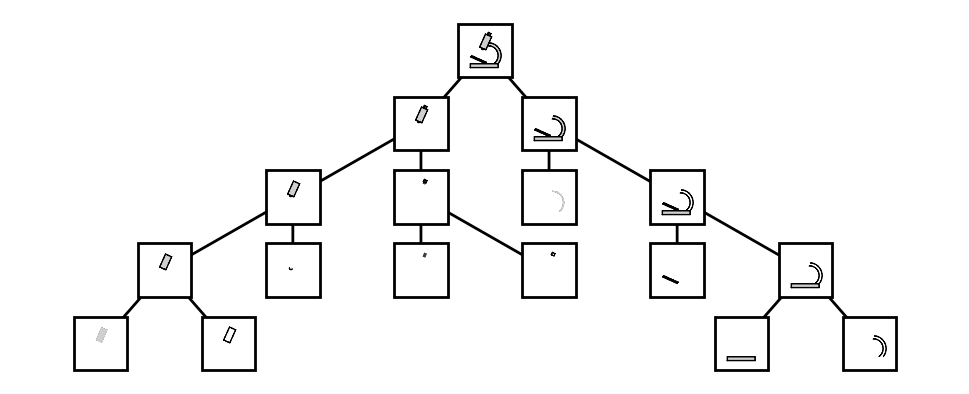

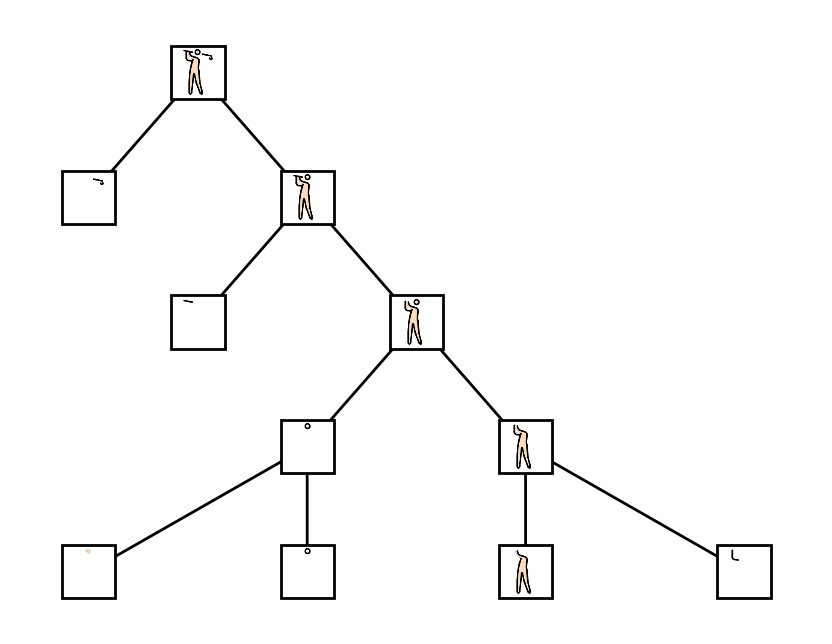

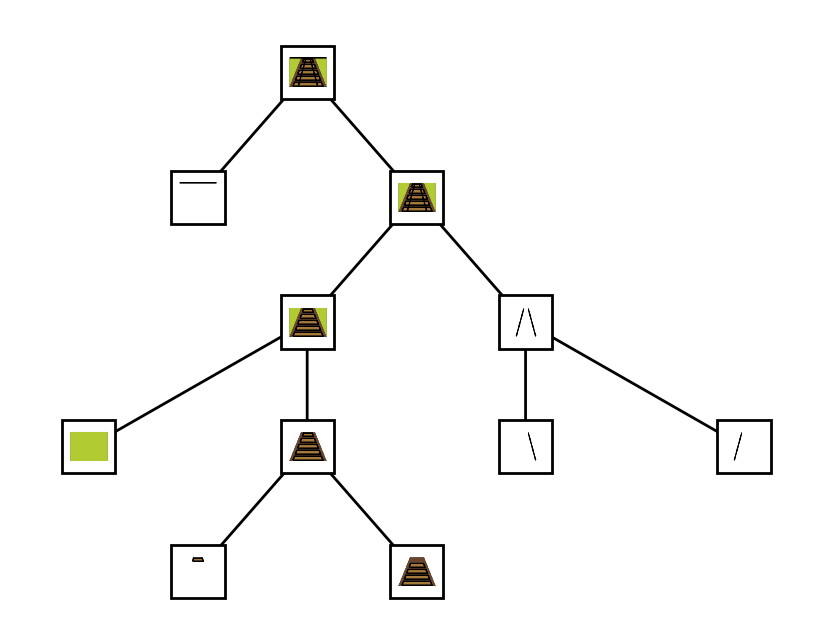

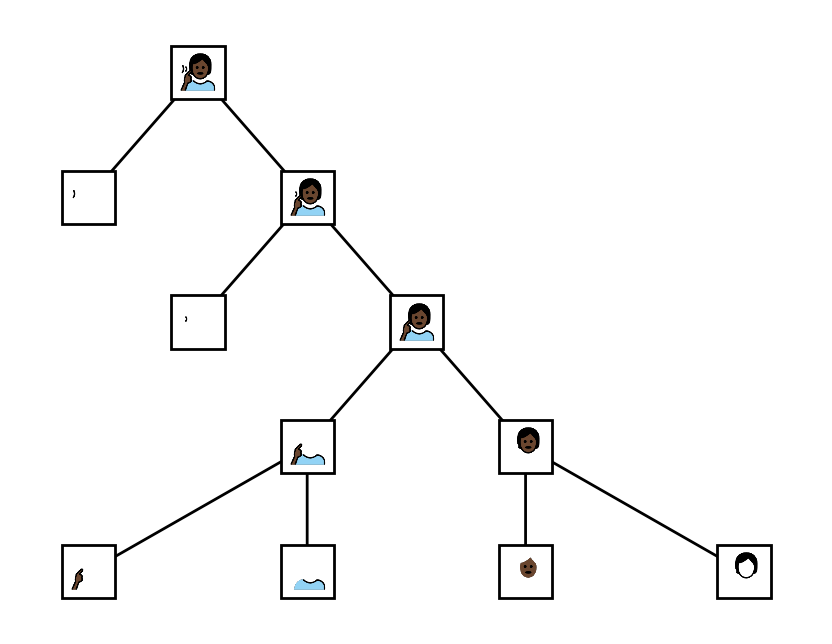

./data/47271d5a-3410-41d4-bbf6-779455f8b974


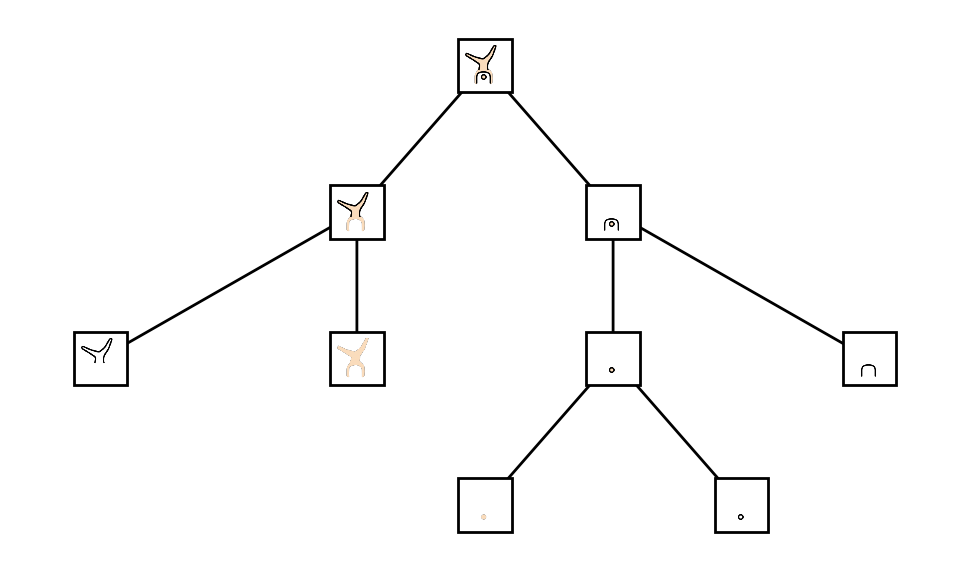

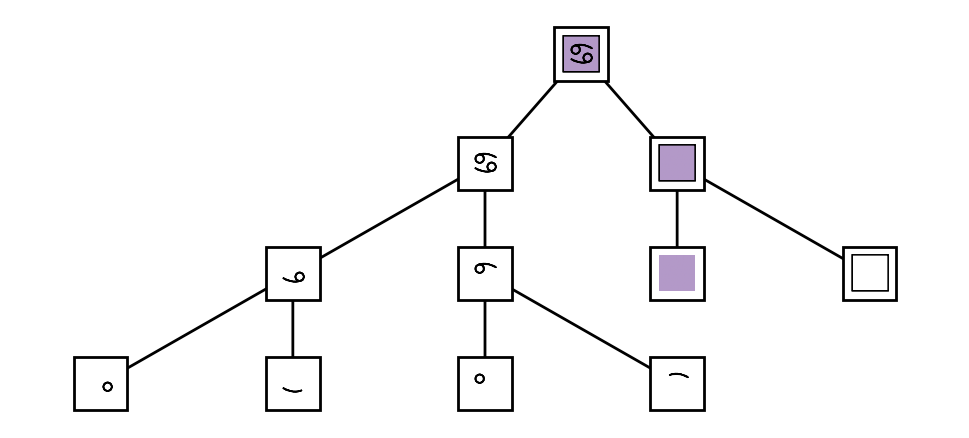

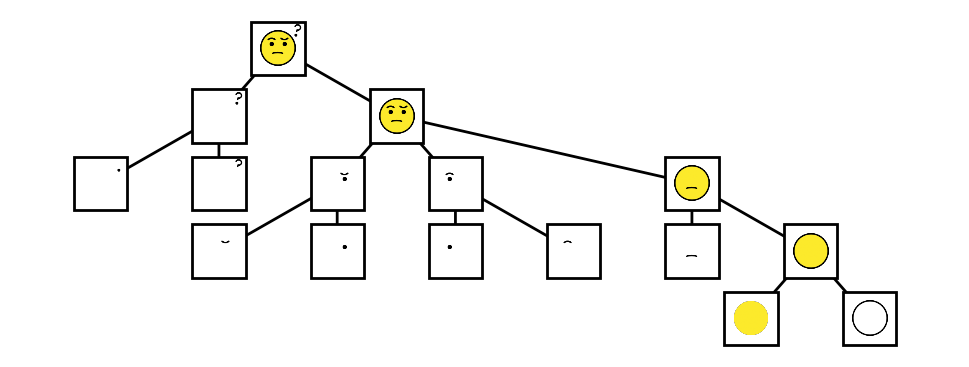

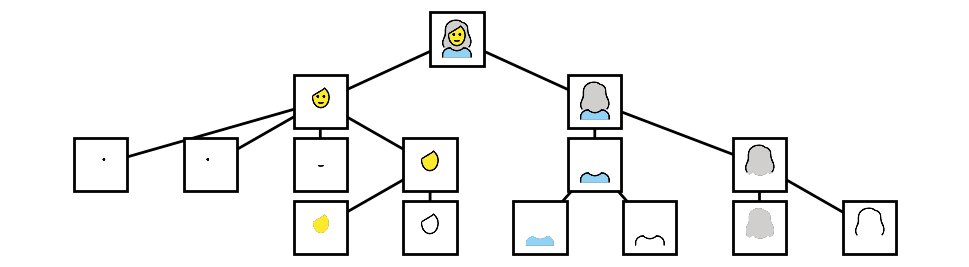

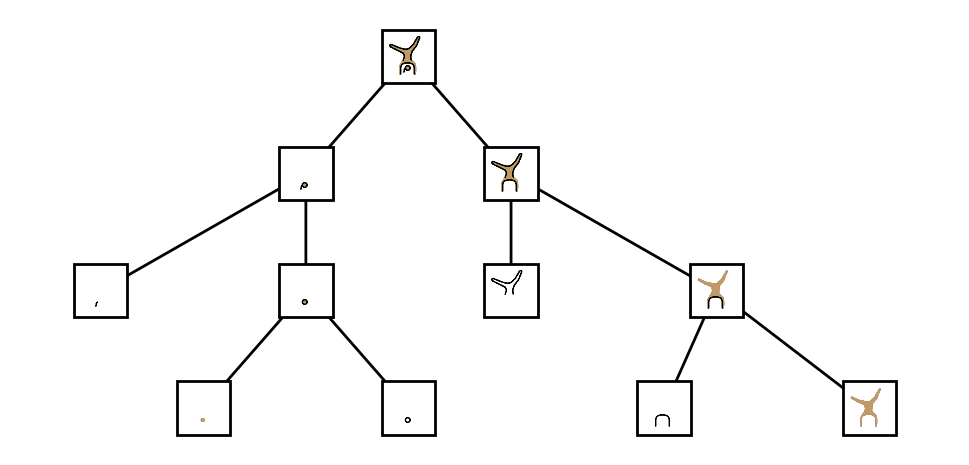

./data/52af0056-1889-48b0-a1fd-2571cdde4cd8


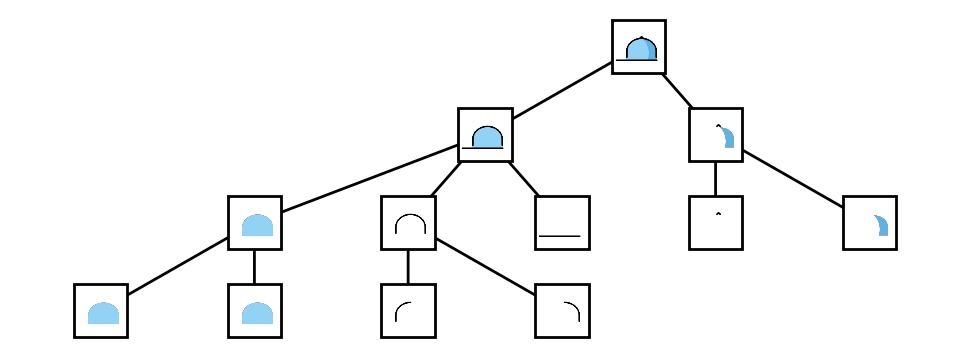

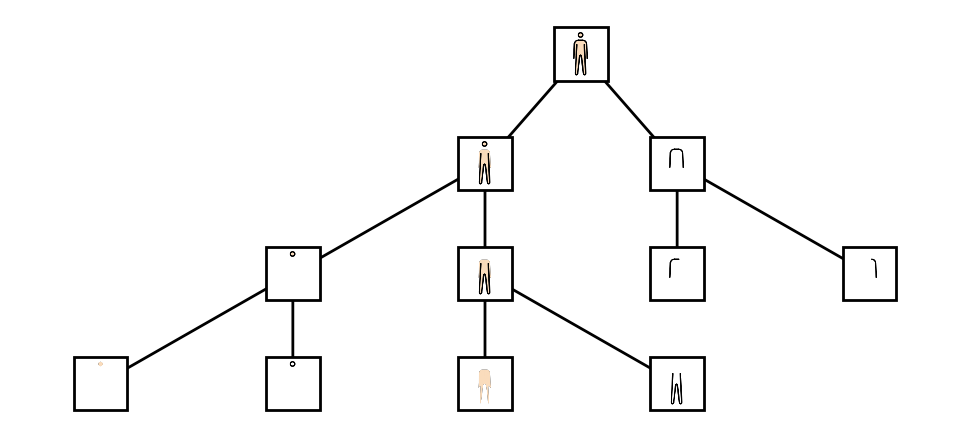

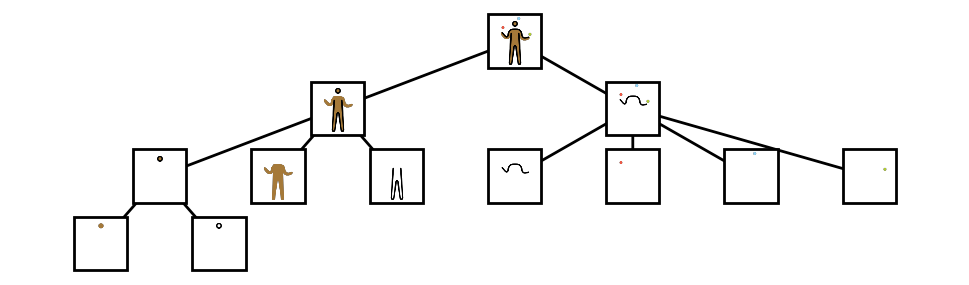

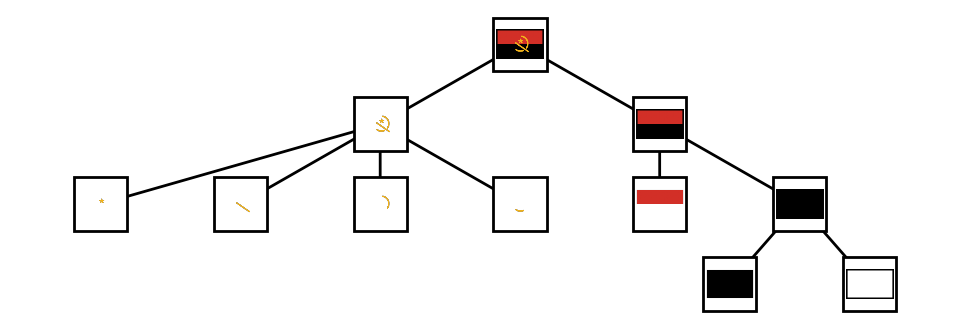

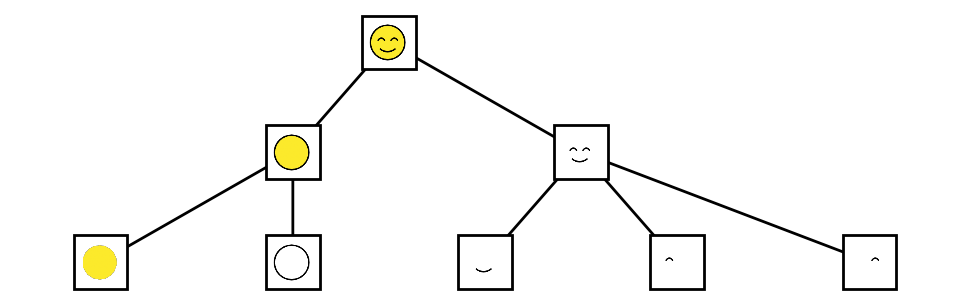

./data/601ce705-aa94-4ecf-a72a-0b8f4e98259d


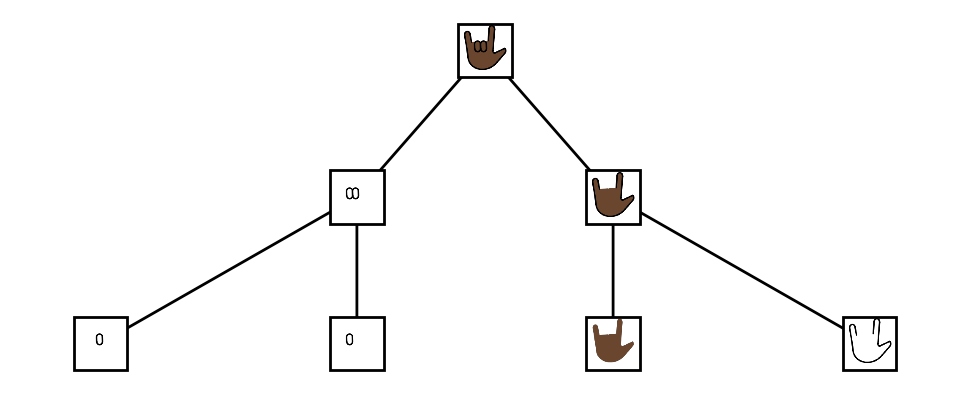

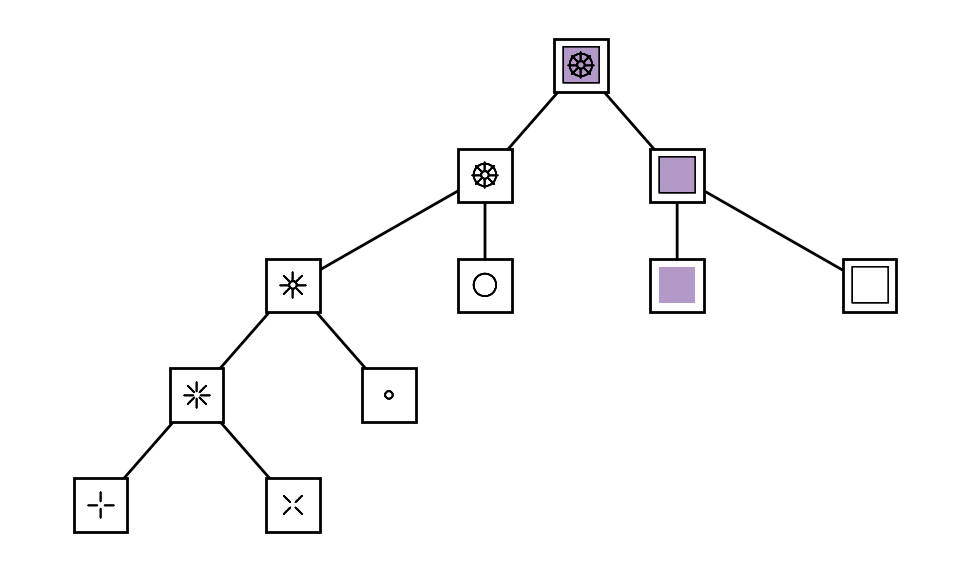

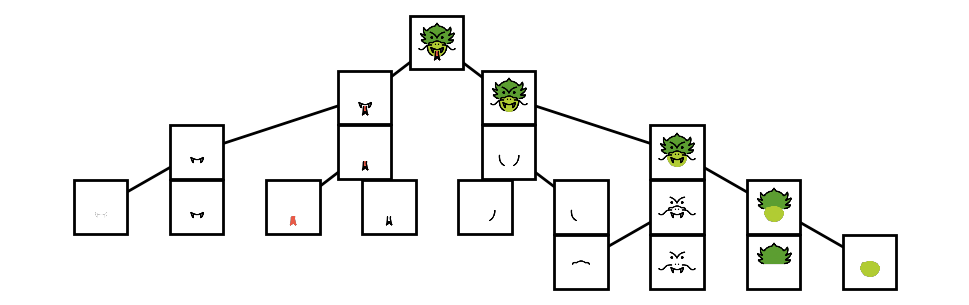

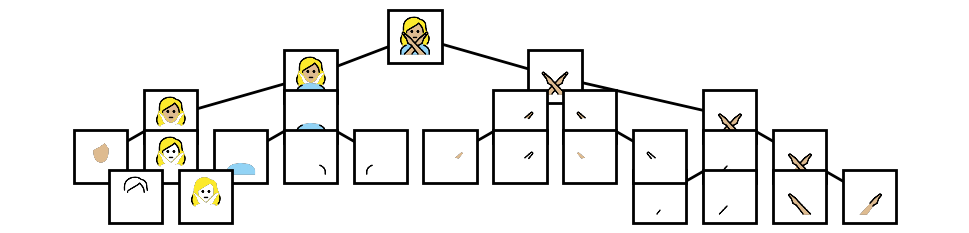

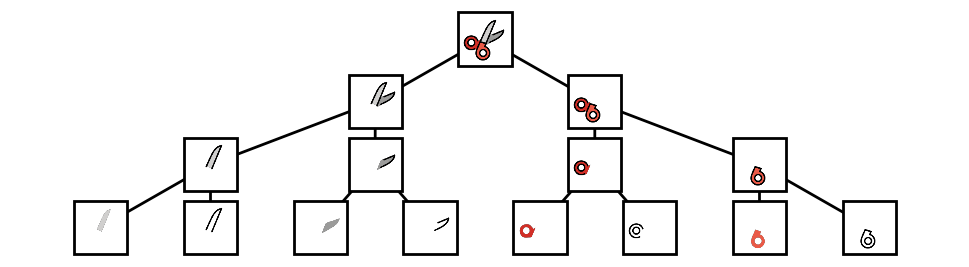

./data/b50373d2-b724-40af-928b-6b58adade6cc


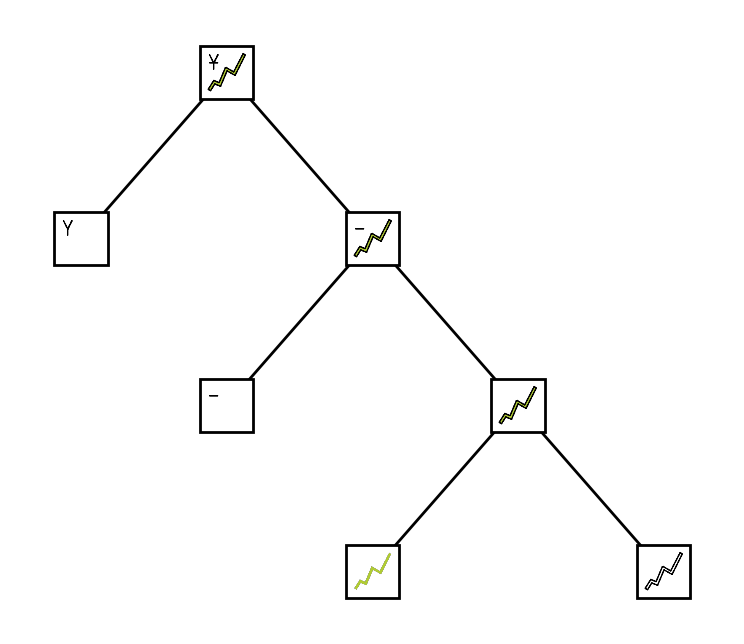

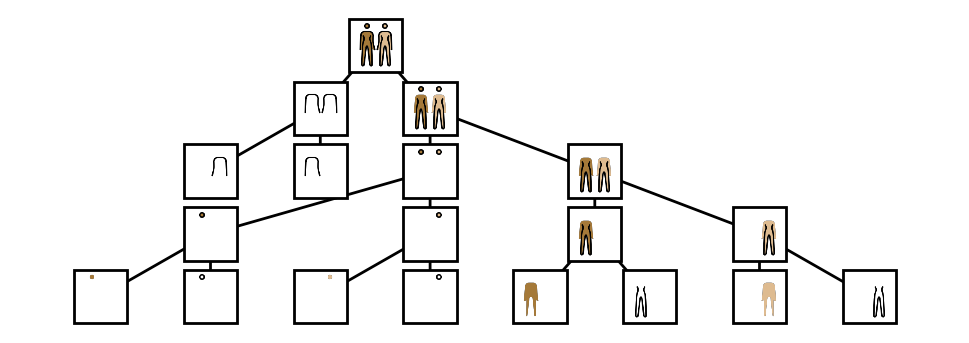

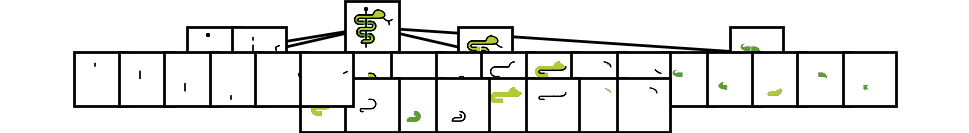

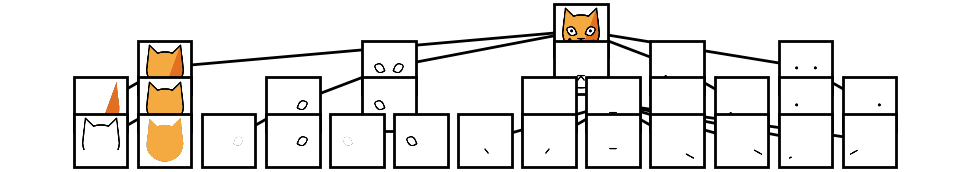

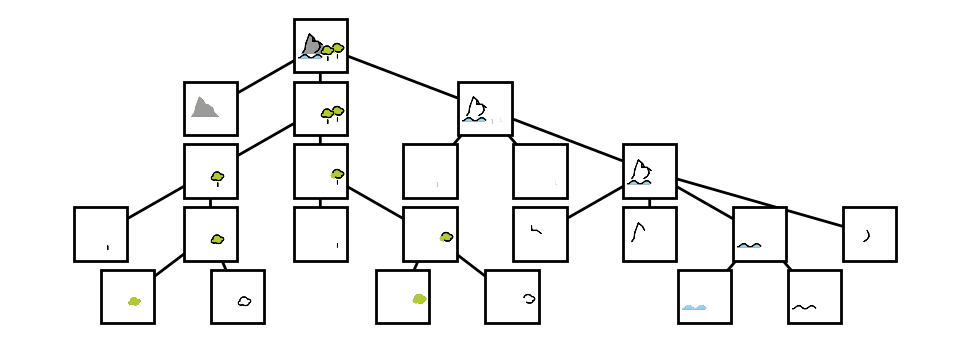

./data/c53905c8-6d8f-4267-afe5-7c046efbaf4f


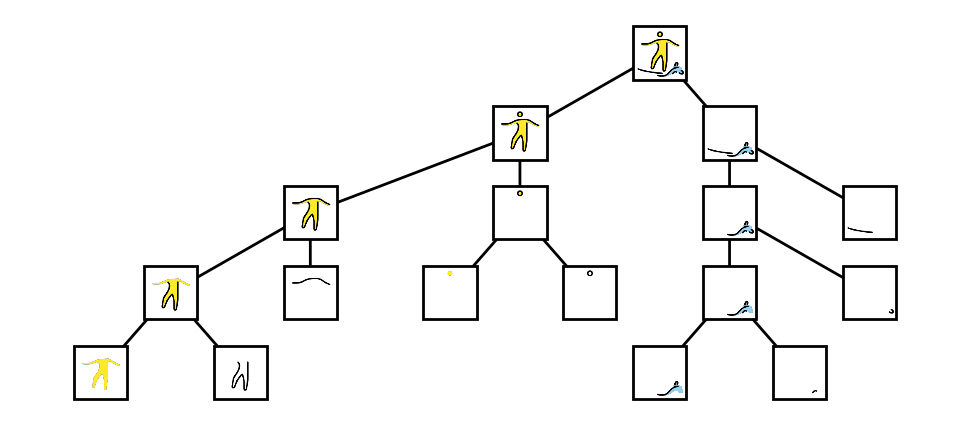

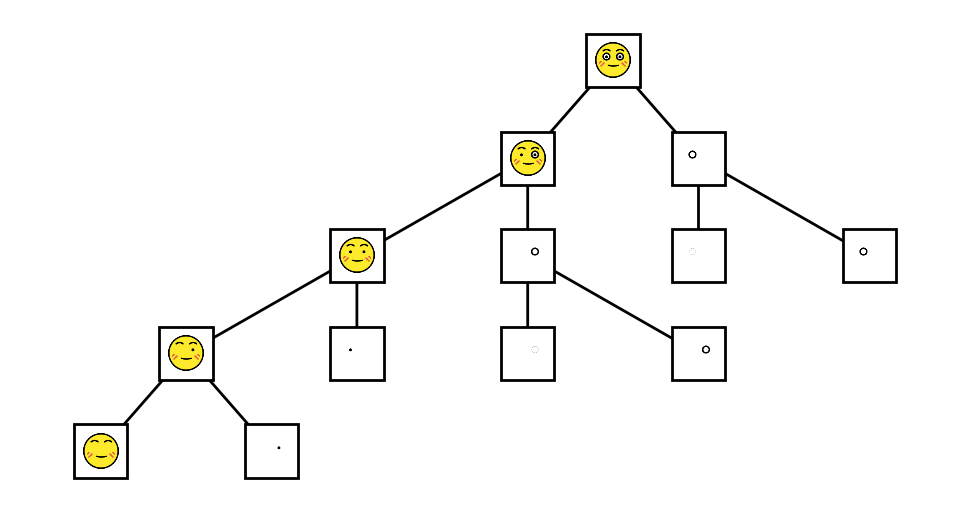

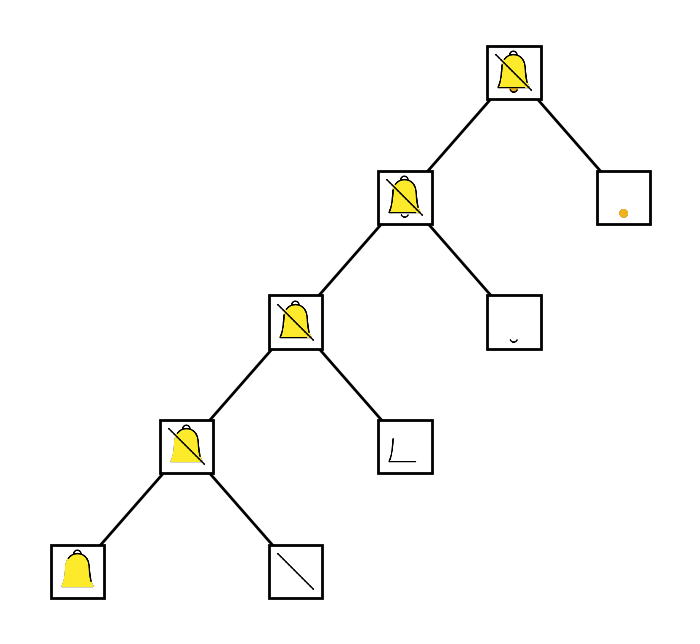

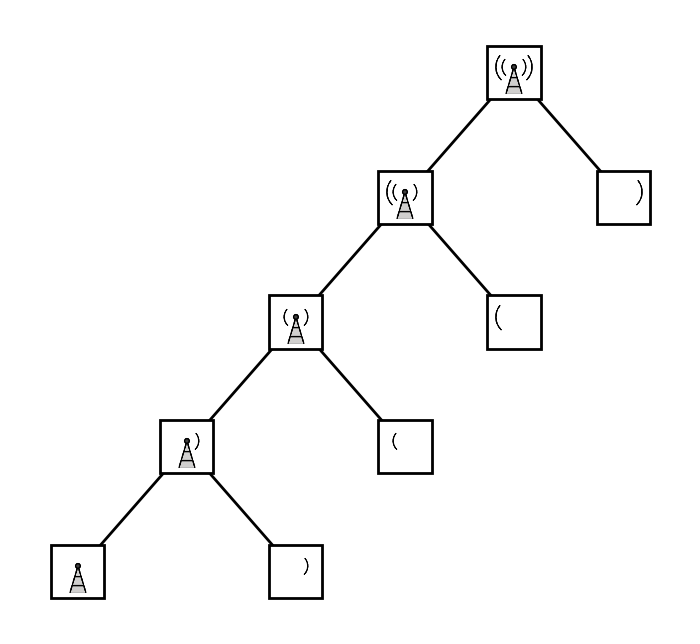

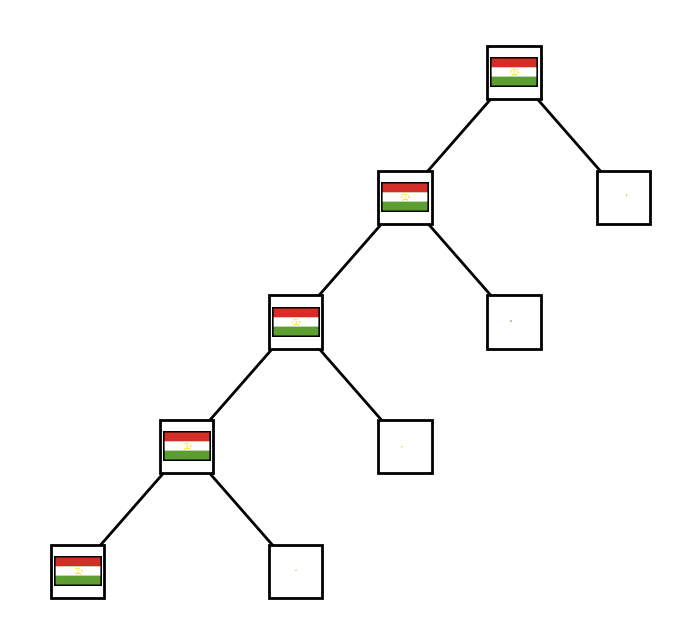

./data/cc96da5a-9f07-4f24-9f5c-2f21d7811a51


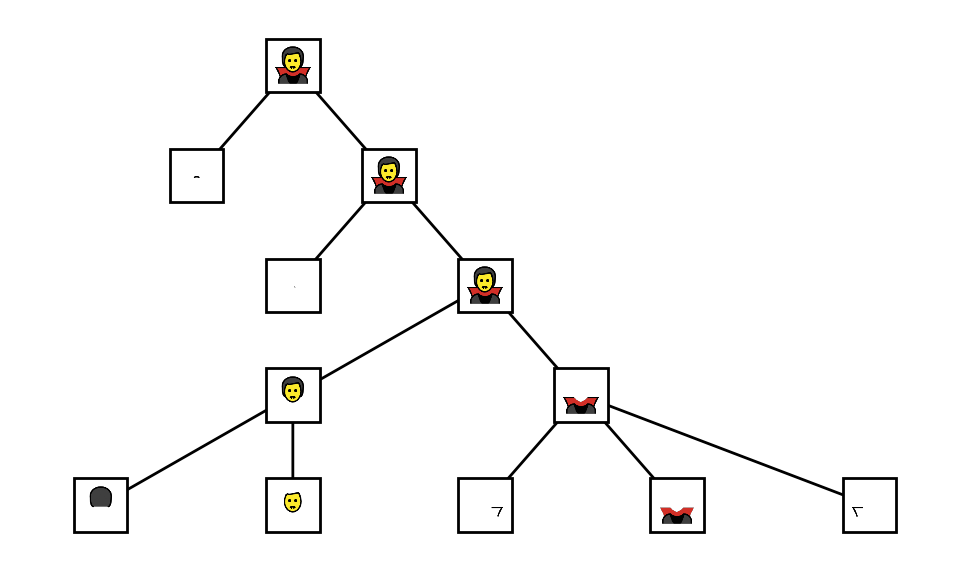

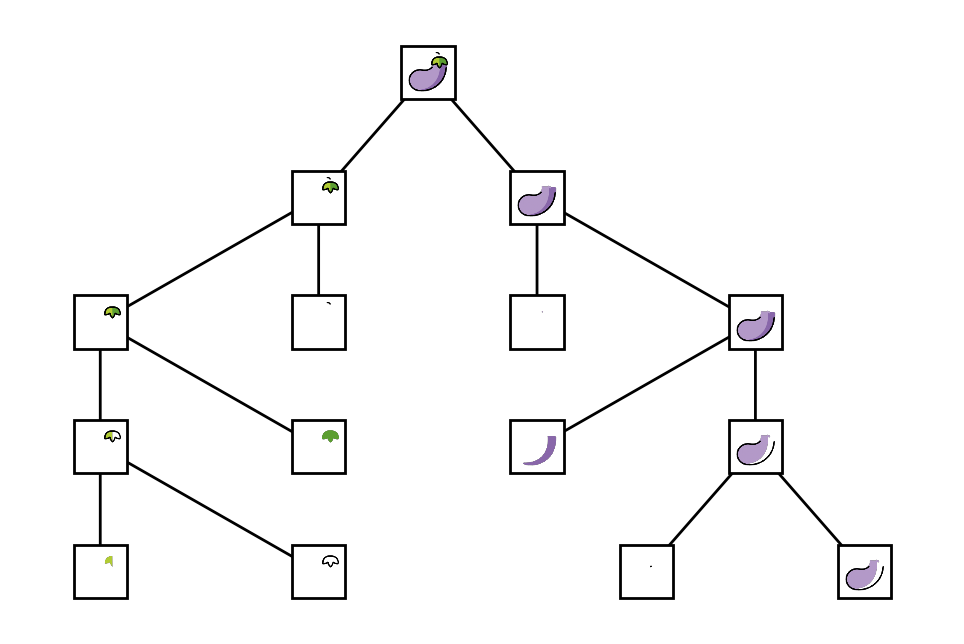

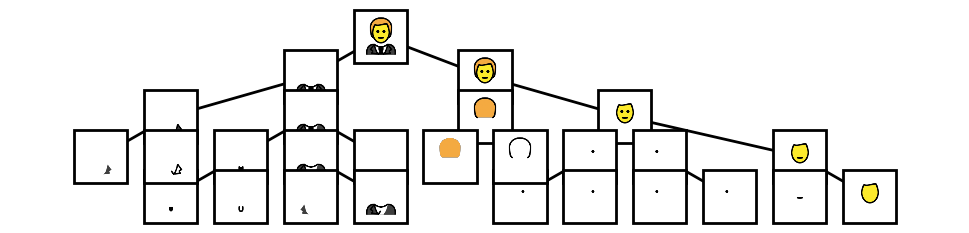

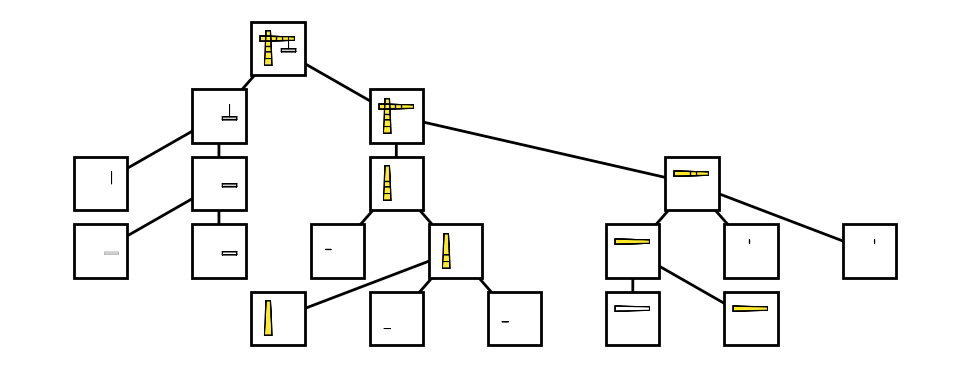

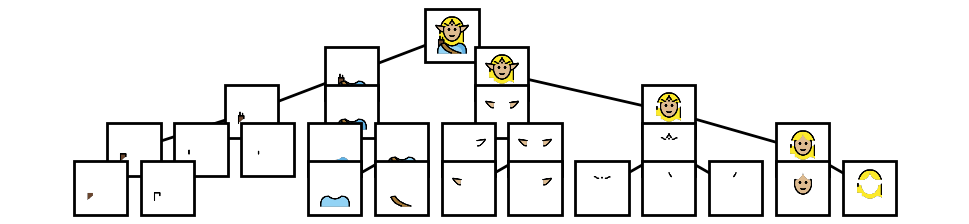

./data/d04d61a8-6a85-423b-98e5-5e7f6b045a66


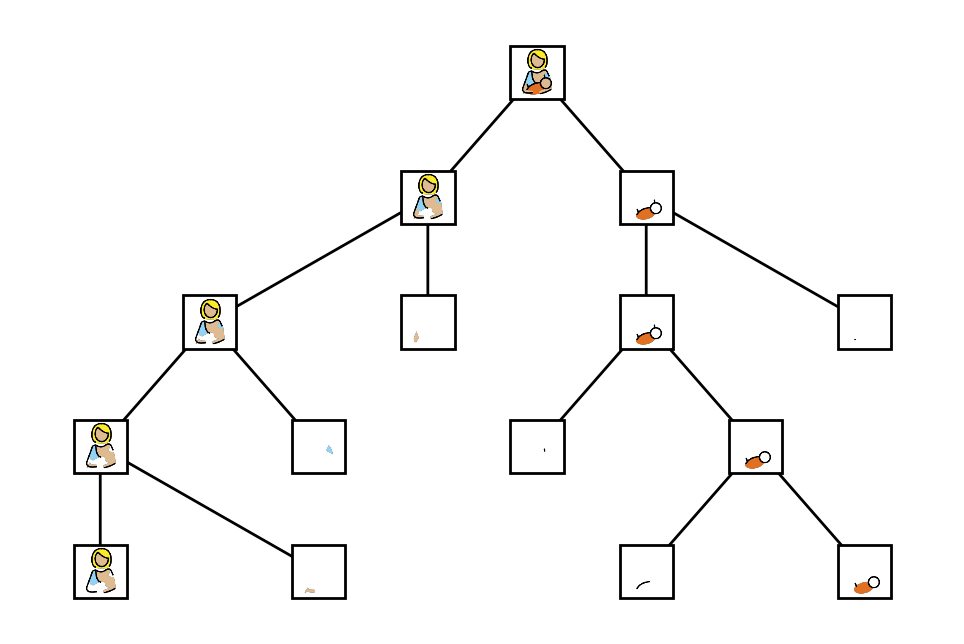

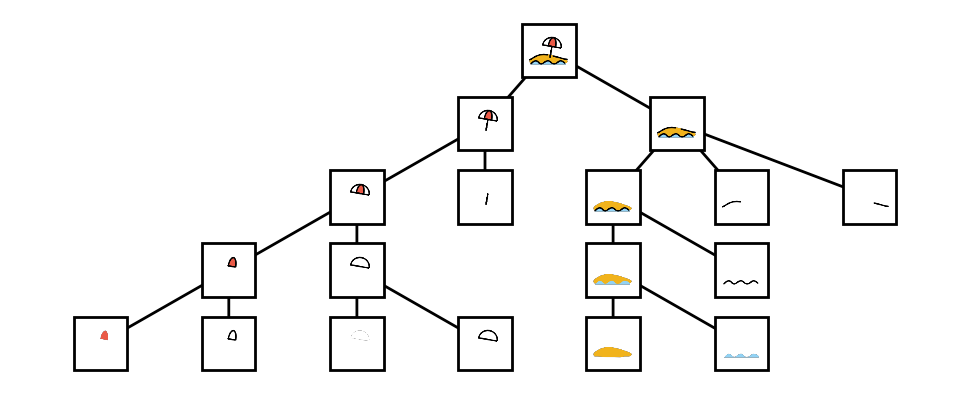

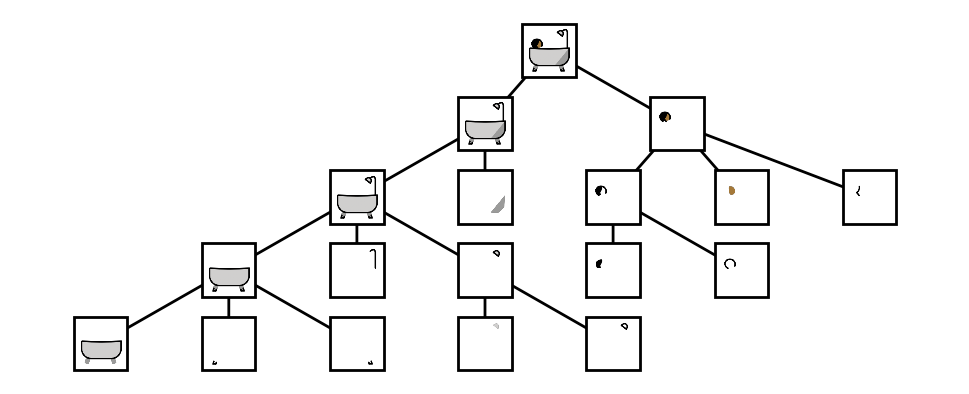

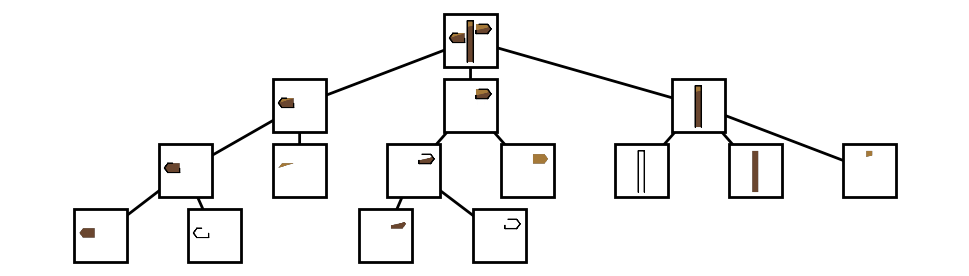

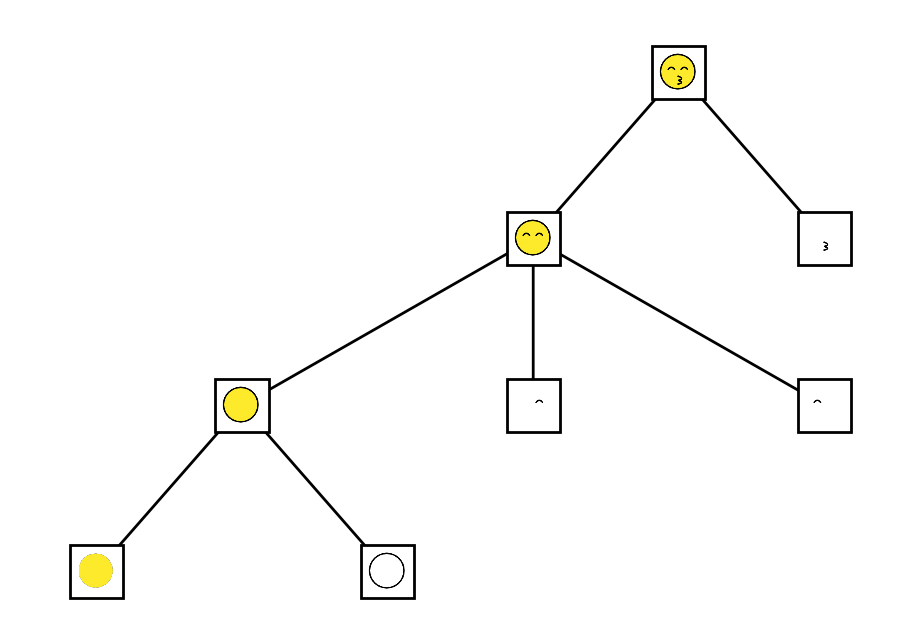

./data/d99c68a3-b932-4553-99d4-84dcaf199dda


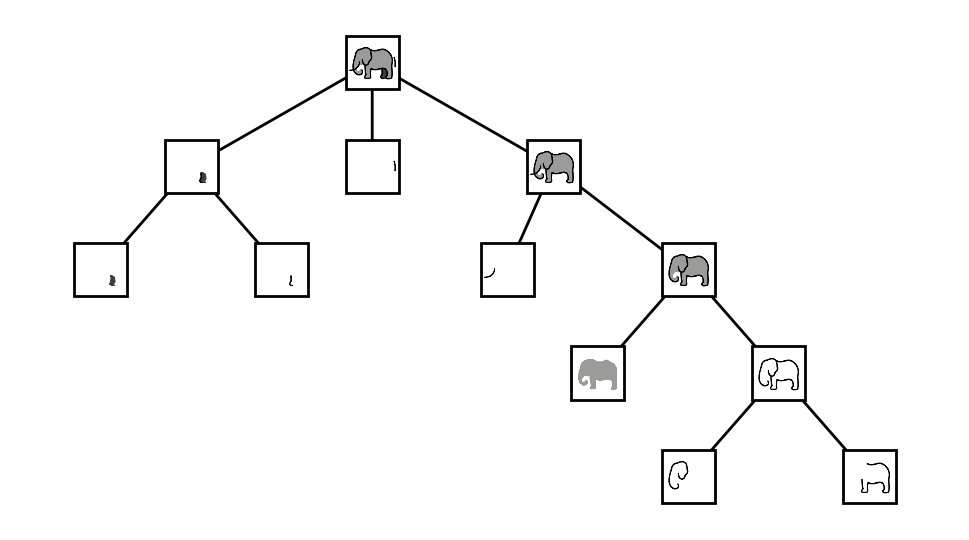

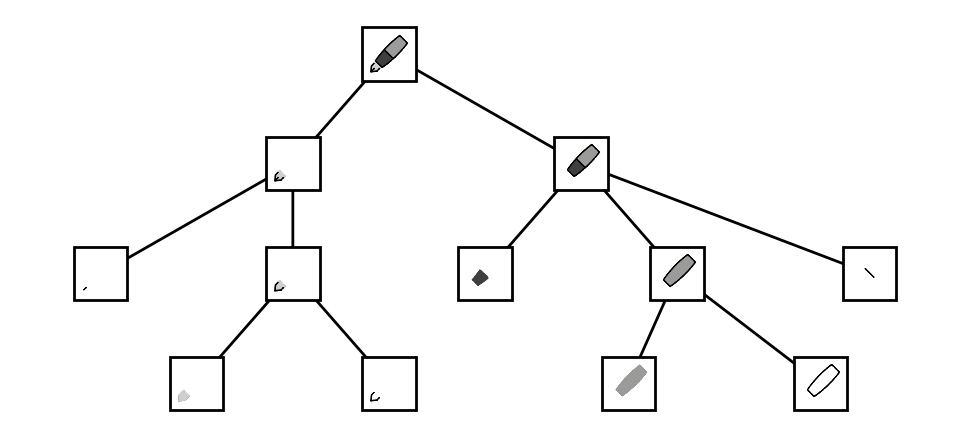

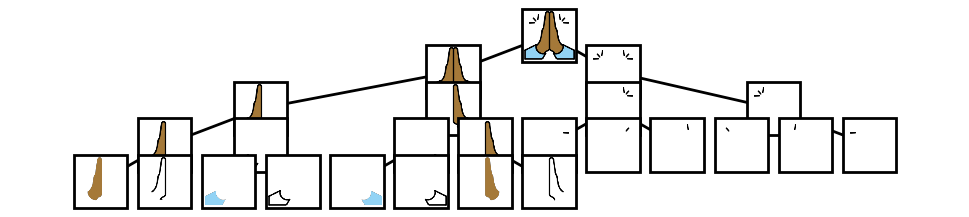

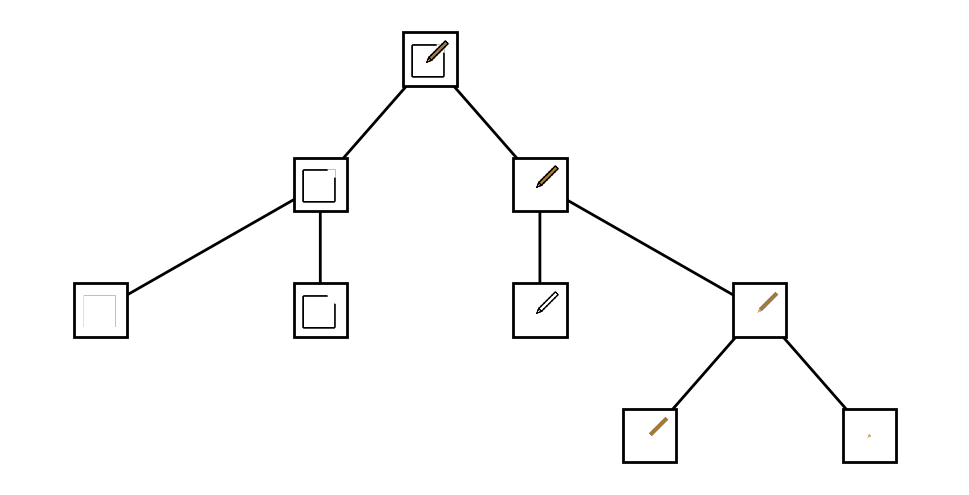

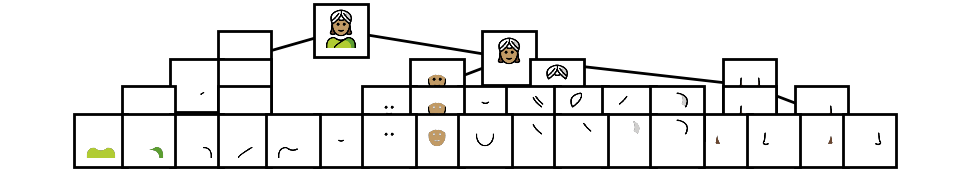

./data/de39fdda-91bf-4693-9a5c-207a4f226889


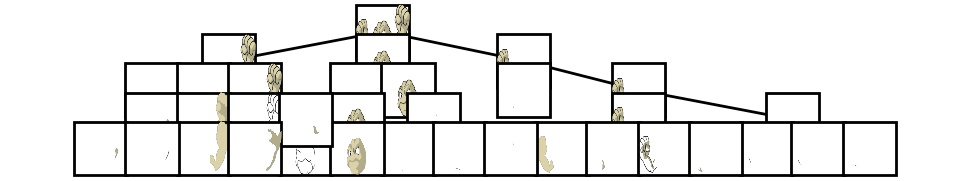

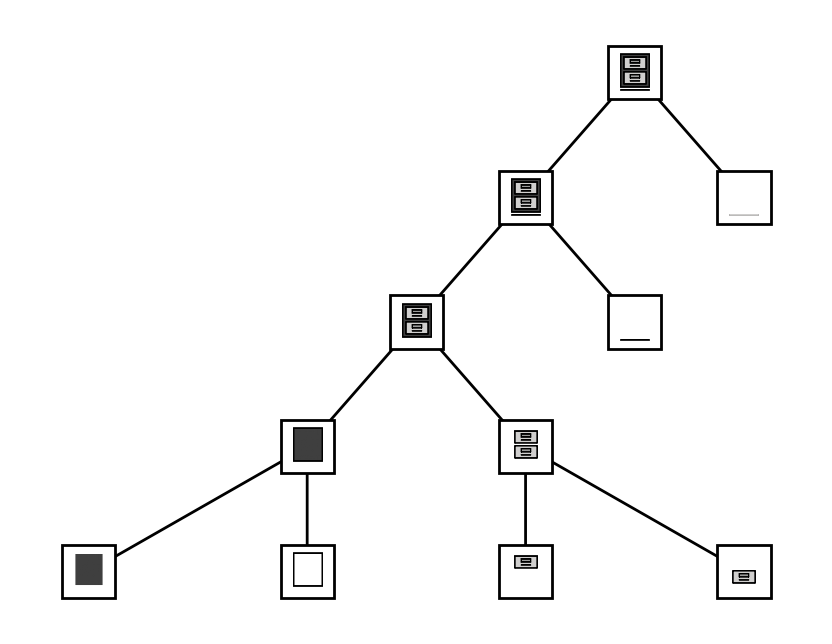

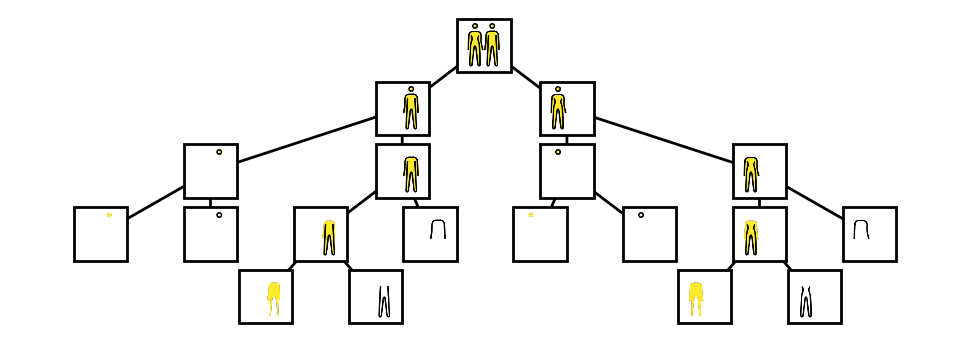

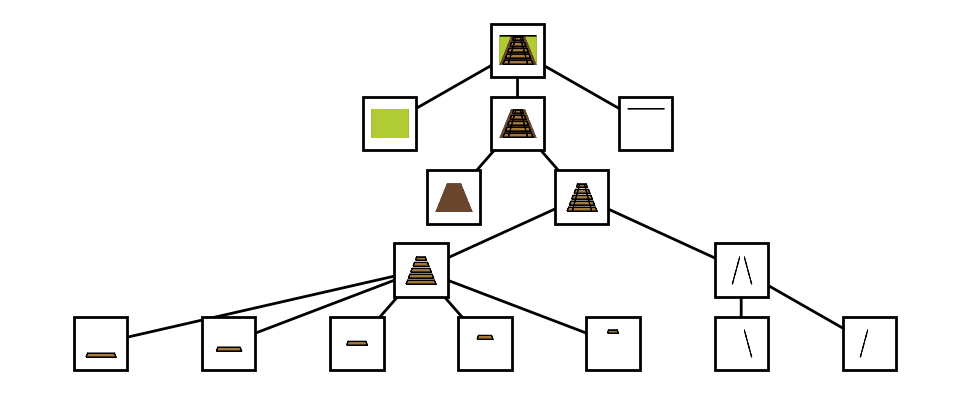

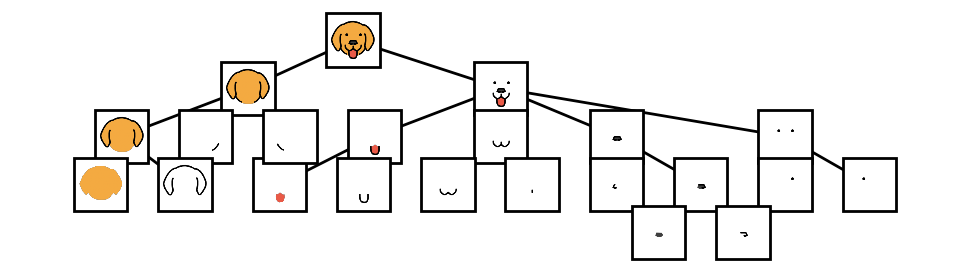

In [3]:
from vectorrvnn.utils import *
from vectorrvnn.data import *
import json

for dir in listdir('./data') : 
  files = list(filter(lambda x : x.endswith('json') and getBaseName(x).startswith('treeData'), allfiles(dir)))
  if len(files) < 5 : continue
  print(dir)
  for i, f in enumerate(files) : 
      with open(f) as fp :
          data = json.load(fp)
      T = appGraph2nxGraph(data['graph'])
      with open('a.svg', 'w+') as fd : 
        fd.write(data['svgString'])
      T = SVGData('a.svg', tree=T)
      treeImageFromGraph(T)
      plt.show()

## Visualize Worker Location

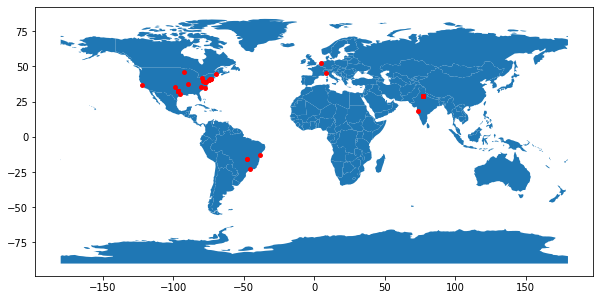

In [7]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from vectorrvnn.utils import *

ips = list(filter(lambda x: x.endswith('ip.json'), allfiles('./data')))
lon, lat = [], []
for f in ips :
    with open(f) as fp: 
        data = json.load(fp)
    lon.append(data['longitude'])
    lat.append(data['latitude'])
df = pd.DataFrame(dict(longitude=lon, latitude=lat)) 
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)